In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
%matplotlib inline

In [3]:
start = datetime.datetime(1980,1,1)
end = datetime.datetime(2019,12,5)

In [4]:
sp500 = web.DataReader('^GSPC', 'yahoo',start,end)

In [6]:
sp500.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-01-02,108.430000,105.290001,107.940002,105.760002,40610000,105.760002
1980-01-03,106.080002,103.260002,105.760002,105.220001,50480000,105.220001
1980-01-04,107.080002,105.089996,105.220001,106.519997,39130000,106.519997
1980-01-07,107.800003,105.800003,106.519997,106.809998,44500000,106.809998
1980-01-08,109.290001,106.290001,106.809998,108.949997,53390000,108.949997


In [7]:
sp500 = sp500.drop(['High','Low','Open','Close','Volume'],axis=1)

In [8]:
sp500['PctChange'] = sp500['Adj Close'].pct_change()

In [9]:
sp500['PctChange'] = sp500['PctChange']+1

In [10]:
sp500['PctChange'][0] = 1

In [11]:
sp500

,Adj Close,PctChange
Date,,
1980-01-02,105.760002,1.000000
1980-01-03,105.220001,0.994894
1980-01-04,106.519997,1.012355
1980-01-07,106.809998,1.002723
1980-01-08,108.949997,1.020036
...,...,...
2019-11-29,3140.979980,0.995989
2019-12-02,3113.870117,0.991369
2019-12-03,3093.199951,0.993362


In [12]:
sp500['Year'] = sp500.index.year

In [13]:
sp500['Day'] = sp500.index.dayofyear

In [14]:
sp500.head()

,Adj Close,PctChange,Year,Day
Date,,,,
1980-01-02,105.760002,1.000000,1980,2
1980-01-03,105.220001,0.994894,1980,3
1980-01-04,106.519997,1.012355,1980,4
1980-01-07,106.809998,1.002723,1980,7
1980-01-08,108.949997,1.020036,1980,8


In [15]:
sp500_years = pd.pivot_table(sp500,index=['Day'],columns=['Year'],values=['PctChange'])

In [22]:
sp500_years = sp500_years.fillna(1)
sp500_years

PctChange                                                              \
Year      1980      1981      1982      1983      1984      1985      1986   
Day                                                                          
2     1.000000  1.004272  1.000000  1.000000  1.000000  0.988818  0.992001   
3     0.994894  1.000000  1.000000  0.983646  0.994604  0.995162  1.006155   
4     1.012355  1.000000  1.001550  1.021830  1.016703  0.994592  1.000000   
5     1.000000  1.011955  0.978084  1.004245  1.012172  1.000000  1.000000   
6     1.000000  1.001087  0.992753  1.023316  1.002784  1.000000  0.998909   
..         ...       ...       ...       ...       ...       ...       ...   
362   1.000000  0.997797  0.990153  1.003520  0.995675  1.000000  1.000000   
363   1.000000  0.995093  1.003339  0.997097  1.003077  1.000000  0.990888   
364   0.988724  1.005178  0.993557  1.000425  1.000000  1.005105  0.994687   
365   1.002222  1.002044  1.002209  1.000000  1.000000  1.002848  0.995069   
366   1.003177  1.000000  1.000000  1.000000  1.005894  1.000000  1.000000   

                                    ...                                \
Year      1987      1988      1989  ...      2010      2011      2012   
Day                                 ...                                 
2     1.017674  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
3     1.000000  1.000000  0.991322  ...  1.000000  1.011315  1.015474   
4     1.000000  1.035859  1.014965  ...  1.016043  0.998687  1.000188   
5     1.023291  1.010510  1.002076  ...  1.003116  1.005007  1.002944   
6     1.002339  1.001005  1.002357  ...  1.000546  0.997877  0.997463   
..         ...       ...       ...  ...       ...       ...       ...   
362   0.974368  0.996257  1.005332  ...  1.000771  0.987522  0.998782   
363   0.996009  1.000903  1.007785  ...  1.001009  1.010707  0.988950   
364   1.013369  1.008373  1.000000  ...  0.998492  0.995709  1.000000   
365   0.996853  0.993987  1.000000  ...  0.999809  1.000000  1.000000   
366   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.016942   

                                                                            
Year      2013      2014      2015      2016      2017      2018      2019  
Day                                                                         
2     1.025403  0.991138  0.999660  1.000000  1.000000  1.008303  1.001268  
3     0.997914  0.999667  1.000000  1.000000  1.008487  1.006399  0.975243  
4     1.004865  1.000000  1.000000  0.984696  1.005722  1.004029  1.034336  
5     1.000000  1.000000  0.981722  1.002012  0.999229  1.007034  1.000000  
6     1.000000  0.997488  0.991107  0.986885  1.003517  1.000000  1.000000  
..         ...       ...       ...       ...       ...       ...       ...  
362   1.000000  1.000000  0.997821  1.002248  1.001834  0.998758  1.000000  
363   1.000000  1.000862  1.010630  0.991643  0.994817  1.000000  1.000000  
364   0.999821  0.995111  0.992783  0.999707  1.000000  1.000000  1.000000  
365   1.003960  0.989689  0.990588  0.995363  1.000000  1.008492  1.000000  
366   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  

[365 rows x 40 columns]

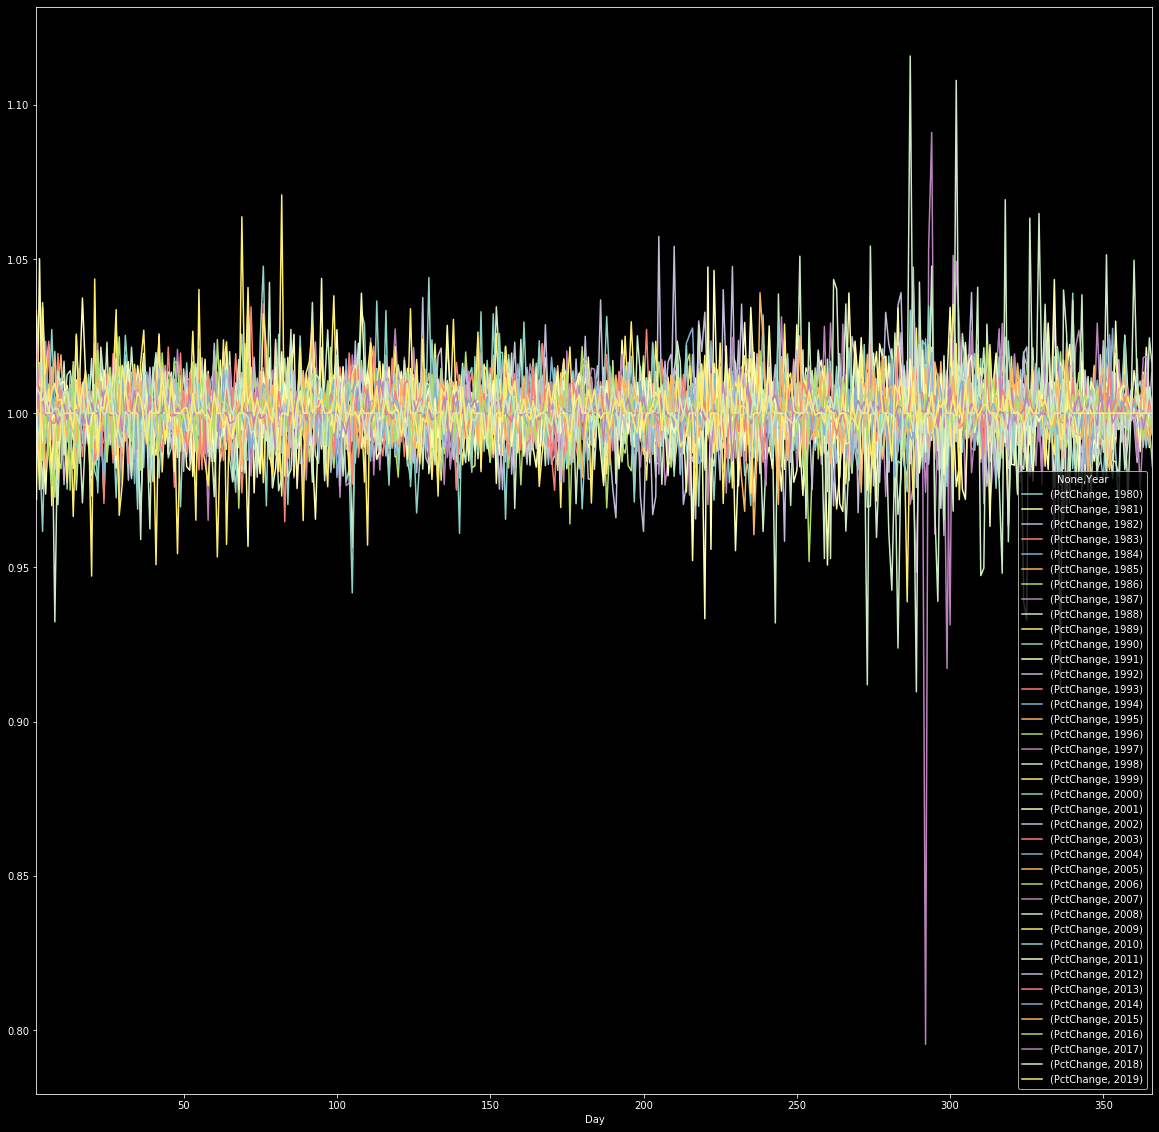

In [23]:
plt.style.use('dark_background')
sp500_years.plot(figsize=(20,20));

In [24]:
sp500_years_compret = sp500_years.cumprod(axis=0)

In [25]:
sp500_years_compret.max().sort_values(ascending=False)

           Year
PctChange  1987    1.390635
           1995    1.353648
           1980    1.328669
           1997    1.328118
           2013    1.296012
           1989    1.295549
           1998    1.279649
           1985    1.267759
           2003    1.263804
           1991    1.263067
           2019    1.258005
           2009    1.248580
           1996    1.229085
           1983    1.227602
           1986    1.202196
           2017    1.201592
           1999    1.195260
           1982    1.167034
           2012    1.165530
           1988    1.148049
           2006    1.143236
           2014    1.131041
           2010    1.129746
           2016    1.111442
           2007    1.103539
           2018    1.096177
           2004    1.091400
           2011    1.084261
           1993    1.080857
           1992    1.057997
           2005    1.050185
           1990    1.044001
           2001    1.040484
           2000    1.039619
           2015    1.034931
    

In [26]:
sp500_years_compret.shape

(365, 40)

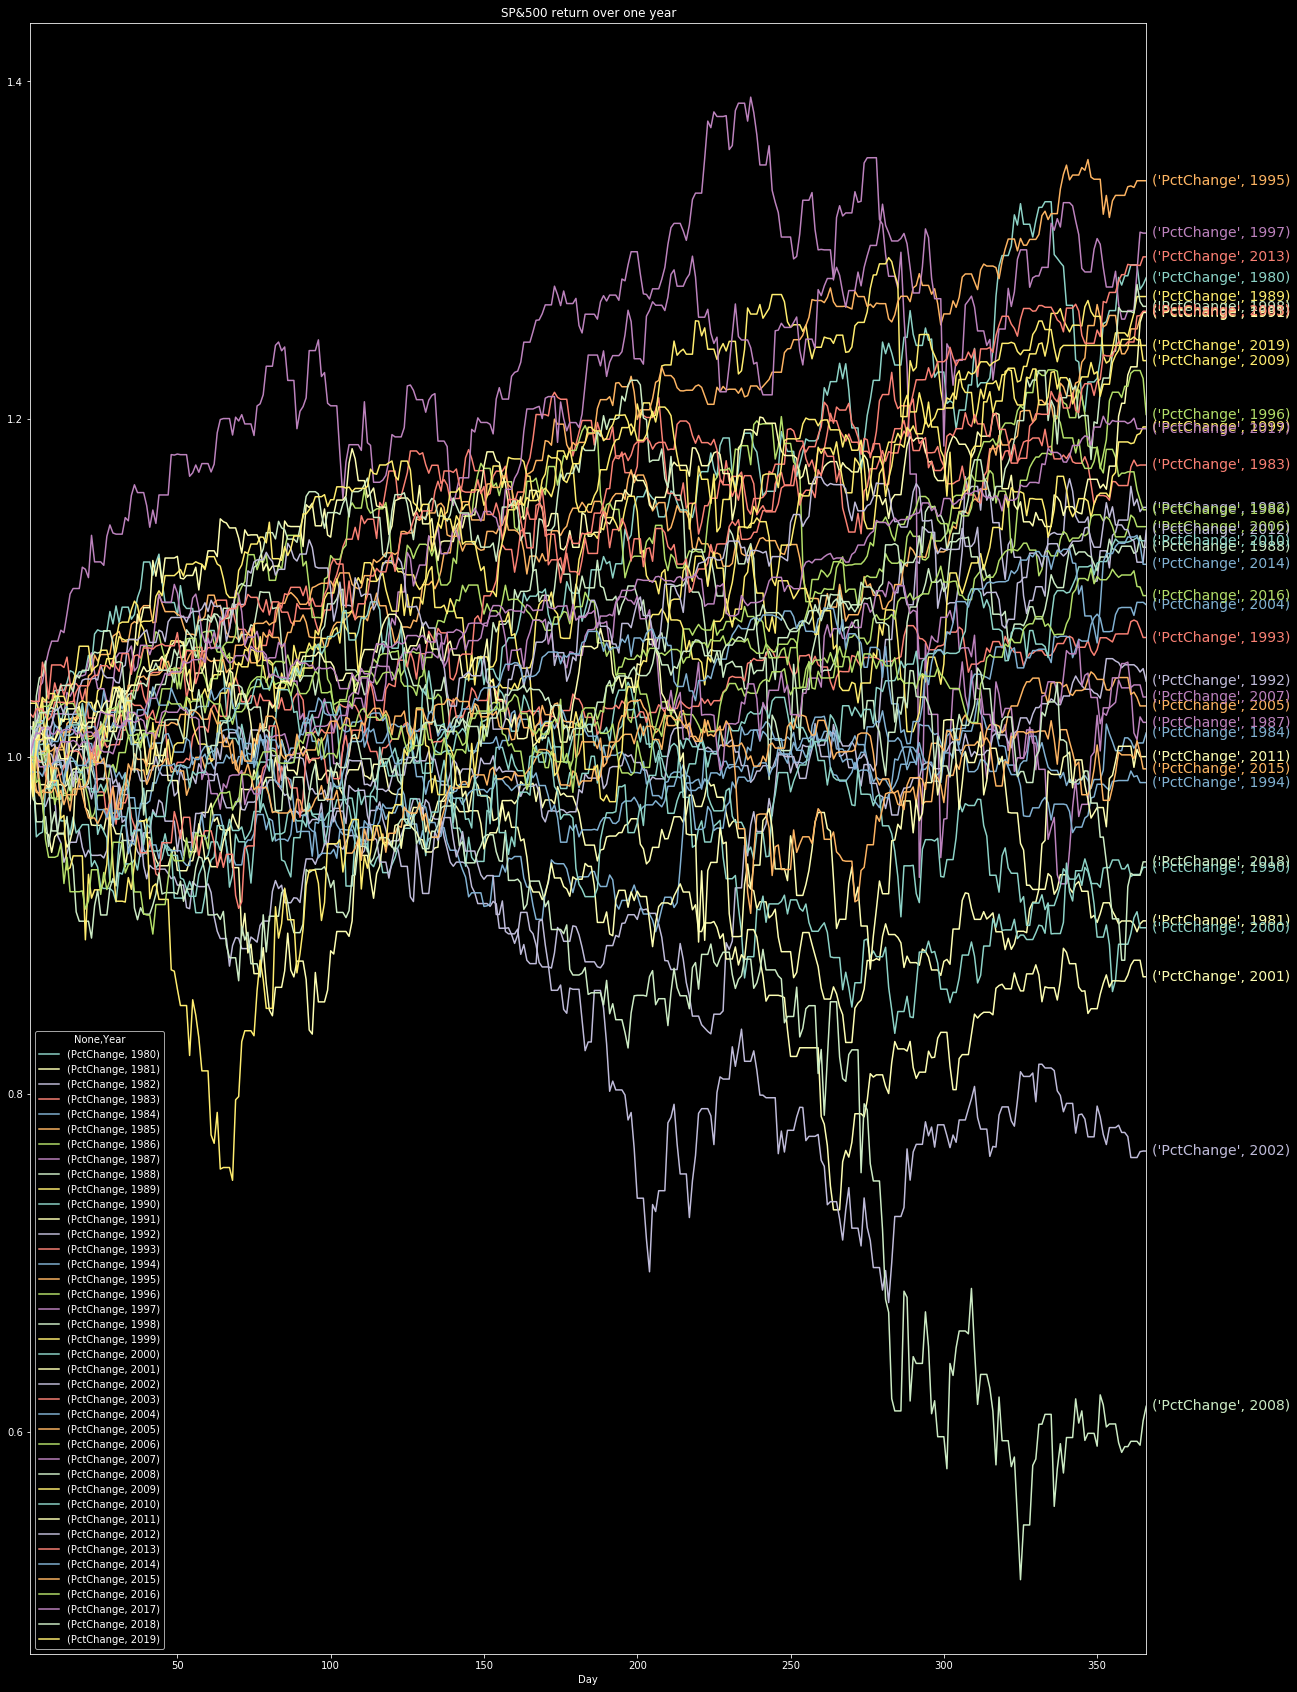

In [29]:
ax = sp500_years_compret.plot(figsize=(20,30))
for line, name in zip(ax.lines, sp500_years_compret.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")
plt.title('SP&500 return over one year')
plt.show();

In [28]:
sp500_years_compret[150:365]

PctChange                                                              \
Year      1980      1981      1982      1983      1984      1985      1986   
Day                                                                          
152   1.051815  0.975324  0.911301  1.155788  0.912812  1.133401  1.170721   
153   1.051815  0.962139  0.914239  1.165956  0.929122  1.133401  1.159788   
154   1.047277  0.962802  0.912770  1.169084  0.929122  1.132026  1.162012   
155   1.044913  0.964644  0.898327  1.169084  0.929122  1.136331  1.154582   
156   1.064769  0.973925  0.898327  1.169084  0.935791  1.137049  1.162675   
..         ...       ...       ...       ...       ...       ...       ...   
362   1.291320  0.900633  1.148674  1.175626  1.004972  1.253348  1.168686   
363   1.291320  0.896214  1.152509  1.172213  1.008064  1.253348  1.158037   
364   1.276759  0.900855  1.145084  1.172710  1.008064  1.259746  1.151884   
365   1.279595  0.902696  1.147613  1.172710  1.008064  1.263334  1.146204   
366   1.283661  0.902696  1.147613  1.172710  1.014006  1.263334  1.146204   

                                    ...                                \
Year      1987      1988      1989  ...      2010      2011      2012   
Day                                 ...                                 
152   1.196804  1.061033  1.159333  ...  0.960192  1.045251  1.041929   
153   1.191147  1.079367  1.172116  ...  0.985006  1.043971  1.016253   
154   1.211835  1.073863  1.172116  ...  0.988996  1.033809  1.016253   
155   1.218524  1.078396  1.172116  ...  0.954964  1.033809  1.016253   
156   1.211752  1.078396  1.159549  ...  0.954964  1.033809  1.016365   
..         ...       ...       ...  ...       ...       ...       ...   
362   1.014040  1.120406  1.262675  ...  1.128607  0.993639  1.127624   
363   1.009993  1.121418  1.272505  ...  1.129746  1.004278  1.115164   
364   1.023496  1.130808  1.272505  ...  1.128042  0.999968  1.115164   
365   1.020275  1.124008  1.272505  ...  1.127827  0.999968  1.115164   
366   1.020275  1.124008  1.272505  ...  1.127827  0.999968  1.134057   

                                                                            
Year      2013      2014      2015      2016      2017      2018      2019  
Day                                                                         
152   1.143424  1.040690  1.025659  1.025935  1.085415  1.022819  1.097816  
153   1.143424  1.041448  1.024625  1.027100  1.089440  1.022819  1.097816  
154   1.150211  1.041053  1.026796  1.030001  1.089440  1.022819  1.094780  
155   1.143873  1.043022  1.017942  1.027002  1.089440  1.027401  1.118244  
156   1.128111  1.049828  1.016480  1.027002  1.088113  1.028123  1.127371  
..         ...       ...       ...       ...       ...       ...       ...  
362   1.291132  1.130067  0.998834  1.110052  1.200422  0.929732  1.243565  
363   1.291132  1.131041  1.009452  1.100776  1.194200  0.929732  1.243565  
364   1.290901  1.125511  1.002166  1.100453  1.194200  0.929732  1.243565  
365   1.296012  1.113906  0.992734  1.095350  1.194200  0.937627  1.243565  
366   1.296012  1.113906  0.992734  1.095350  1.194200  0.937627  1.243565  

[215 rows x 40 columns]